# Approximations worksheet

PHYS475 - Advanced Quantum Mechanics

(c) 2025, Theodore Corcovilos

The purpose of this file is to give you a starting point to investigate the questions posed in "Writing Assignment 1".  You'll get the most out of this by exerimenting with the code: change some of the variables, try different potentials, explore!

## Truncated Basis approximation
Solving the Hamiltonian

$$ \hat{H} = \frac12 \hat{p}^2 + \frac12 \hat{x}^2 + \frac12 \alpha^2 \hat{x}^2 $$

using the **truncated basis approximation**, using the harmonic oscillator energy basis.

The size of the basis is set by changing the variable `nmax` below.

The value of $ \alpha $ is set by changing the variable `alpha` below.

In [1]:
# import some needed libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [2]:
nmax = 8 # max energy level to include (counting starts at zero)

In [3]:
alpha = 0.3 # perturbation parameter value

In [4]:
# The exact eigenvalues for later comparison...
def exact_energy(n,alpha):
    '''
    The exact eigenenergy for the n-th state and perturbation parameter alpha
    '''
    return np.sqrt(1+alpha**2)*(n+0.5) # exact energies, calculated earlier by solving H by hand.
exactEn = exact_energy(np.array(range(nmax+1)),alpha) # list of the first nmax energies 

In [5]:
print(exactEn)

[0.52201533 1.56604598 2.61007663 3.65410728 4.69813793 5.74216858
 6.78619923 7.83022988 8.87426053]


Below, the lowering operator $ \hat{a} $ is defined in matrix form.  The code is a shortcut to generate the matrix elements

$$ a_{mn} = \langle m | \hat{a} | n \rangle  = \sqrt{n}\, \langle m | n-1 \rangle = \sqrt{n}\, \delta_{m,n-1}. $$

In [6]:
a = np.matrix(np.diag(np.sqrt(np.array(range(nmax))+1.),k=1)) # lowering operator in matrix form

In [7]:
print(a) # show the matrix form of a

[[0.         1.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.82842712]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


In [8]:
print(a.H) # the .H method of a numpy matrix is the Hermitian conjugate, what we call "dagger".

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.82842712 0.        ]]


In [9]:
a*a.H-a.H*a # just checking if the commutator rule works: [a,a.H]=1
#Should yield the identity matrix.  (Last row/column will be wrong because we are approximating.)

matrix([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -8.]])

In [10]:
x = (a + a.H)/np.sqrt(2.) # define the position operator x

In [11]:
print(x)

[[0.         0.70710678 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.70710678 0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.         1.         0.         1.22474487 0.         0.
  0.         0.         0.        ]
 [0.         0.         1.22474487 0.         1.41421356 0.
  0.         0.         0.        ]
 [0.         0.         0.         1.41421356 0.         1.58113883
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.58113883 0.
  1.73205081 0.         0.        ]
 [0.         0.         0.         0.         0.         1.73205081
  0.         1.87082869 0.        ]
 [0.         0.         0.         0.         0.         0.
  1.87082869 0.         2.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.         0.        ]]


In [12]:
p = -1.j/np.sqrt(2)*(a-a.H) # define the momentum operator p (j = sqrt(-1))

In [13]:
H0 = p**2/2 + x**2/2 # Unperturbed Hamiltonian ( ** means "power" in python).
# (Note * is matrix multiplication and ** is matrix power for x and p, which are np.matrix objects.)

In [14]:
Hprime = alpha**2/2*x**2 # perturbation to the Hamiltonian

In [15]:
H = np.real(H0 + Hprime) # full Hamiltonian (We know H is real, but python doesn't.)

In [16]:
print(H)

[[0.5225     0.         0.03181981 0.         0.         0.
  0.         0.         0.        ]
 [0.         1.5675     0.         0.05511352 0.         0.
  0.         0.         0.        ]
 [0.03181981 0.         2.6125     0.         0.07794229 0.
  0.         0.         0.        ]
 [0.         0.05511352 0.         3.6575     0.         0.10062306
  0.         0.         0.        ]
 [0.         0.         0.07794229 0.         4.7025     0.
  0.12323758 0.         0.        ]
 [0.         0.         0.         0.10062306 0.         5.7475
  0.         0.14581667 0.        ]
 [0.         0.         0.         0.         0.12323758 0.
  6.7925     0.         0.16837458]
 [0.         0.         0.         0.         0.         0.14581667
  0.         7.8375     0.        ]
 [0.         0.         0.         0.         0.         0.
  0.16837458 0.         4.18      ]]


In [17]:
energies, states = np.linalg.eigh(H) # calculate eigenvalues and eigenvectors

In [18]:
print(energies)

[0.52201533 1.56604598 2.61007661 3.65410729 4.16907582 4.69834509
 5.74221072 6.81048716 7.84763601]


In [19]:
# calculate relative errors in the eigenvalues
errors = (energies-exactEn)/exactEn

In [20]:
# show an example eigenstate vector
print(states[:,1])

[[ 1.20676050e-17]
 [-9.99651966e-01]
 [ 4.44089210e-16]
 [ 2.63731591e-02]
 [ 2.20073988e-16]
 [-6.35162162e-04]
 [ 2.58617359e-18]
 [ 1.47680631e-05]
 [-3.47570000e-16]]


In [21]:
print(errors)

[-2.60958555e-13  6.07839895e-13 -6.29248926e-09  4.48262690e-09
 -1.12611022e-01 -1.81782105e-01 -1.53839944e-01 -1.30231518e-01
 -1.15685642e-01]


In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Energies')

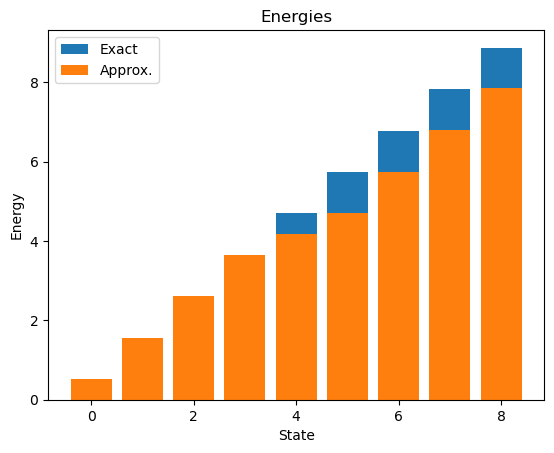

In [23]:
plt.bar(range(nmax+1),exactEn,label="Exact")
plt.bar(range(nmax+1),energies,label="Approx.")
plt.xlabel("State")
plt.ylabel("Energy")
plt.legend()
plt.title("Energies")

In [24]:
error_target = 0.001 # our comparison error level

Text(0.5, 1.0, 'Energy relative errors (Energy basis, nmax=8)')

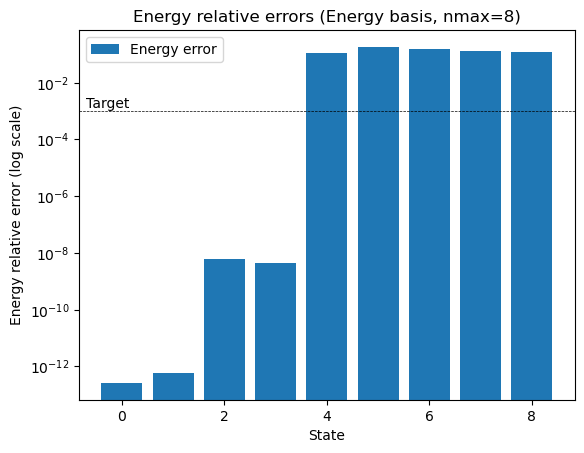

In [25]:
plt.bar(range(nmax+1),np.abs(errors),label="Energy error") # absolute value so we can use a log scale
plt.xlabel("State")
plt.ylabel("Energy relative error (log scale)")
plt.axhline(error_target,c='k',lw=0.5,ls="dashed")
plt.text(-0.7,error_target,"Target",fontsize="medium",verticalalignment="bottom")
plt.yscale("log")
plt.legend()
plt.title(f"Energy relative errors (Energy basis, nmax={nmax})")

Notice that the errors get larger with larger n, particularly for n > nmax/2

We'll define the error in the states by
$$ \text{State error}=  1-| \langle true | approx \rangle |^2 $$

In [26]:
# the "true" states would be the unit vectors, so we can just pull the diagonal elements from the coefficient matrix
# We can't use the same error target because the dimensions are not the same
# TODO What error in the state is analogous to our energy error target?
stateErrors = 1.-np.abs(np.diag(states))**2 

Text(0.5, 1.0, 'State errors (Energy basis, nmax=8)')

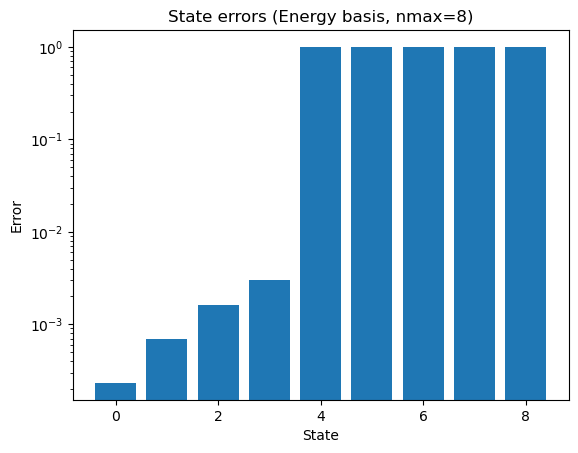

In [27]:
plt.bar(range(nmax+1),stateErrors)
plt.xlabel("State")
plt.ylabel("Error")
plt.yscale("log")
plt.title(f"State errors (Energy basis, nmax={nmax})")

## Position basis approximation
**Numerical solution to the 1-dimensional Time Independent Schrödinger Equation**

Based on the paper "Matrix Numerov method for solving Schrödinger's equation" by Mohandas Pillai, Joshua Goglio, and Thad G. Walker, _American Journal of Physics_ **80** (11), 1017 (2012).  [doi:10.1119/1.4748813](http://dx.doi.org/10.1119/1.4748813)


In [28]:
autoscale = False # set this equal to true to use Pillai's recommended step sizes

In [29]:
# values of constants
hbar = 1.0
mass = 1.0 # changing the mass will also change the energy scale
omega = 1.0

In [30]:
# bounds (These are overwritten if autoscale=True)
xmin = -5.0 # lower bound of position
xmax = 5.0 # upper bound of position
n = 100 # number of steps (may be overwritten if autoscale == True)
dx = (xmax-xmin)/(n-1)

In [31]:
# the function V is the potential energy function
def V(x):
    # make sure there is no division by zero
    # this also needs to be a "vectorizable" function
    # uncomment one of the examples below, or write your own.
    return 0.5*mass*omega**2*x*x # harmonic oscillator
    


In [32]:
if (autoscale): 
    #Emax is the maximum energy for which to check for eigenvalues
    Emax = 20.0
    #The next lines make some reasonable choices for the position grid size and spacing
    xt = opt.brentq(lambda x: V(x)-Emax ,0,5*Emax) #classical turning point
    dx = 1.0/np.sqrt(2*Emax) #step size
    # bounds and number of steps
    n = np.int(0.5+2*(xt/dx + 4.0*np.pi)) #number of steps
    xmin = -dx*(n+1)/2 
    xmax = dx*(n+1)/2

In [33]:
xmin, xmax, n #show the limits and number of steps

(-5.0, 5.0, 100)

In [34]:
#define the x coordinates
x = np.linspace(xmin,xmax,n)

In [35]:
#define the numerov matrices
B = np.matrix((np.eye(n,k=-1)+10.0*np.eye(n,k=0)+np.eye(n,k=1))/12.0)
A = np.matrix((np.eye(n,k=-1)-2.0*np.eye(n,k=0)+np.eye(n,k=1))/(dx**2))

In [36]:
#calculate kinetic energy operator using Numerov's approximation
KE = -0.5*hbar**2/mass*B.I*A

In [37]:
#calculate hamiltonian operator approximation
H = KE + np.diag(V(x))

In [38]:
#Calculate eigenvalues and eigenvectors of H
energies, wavefunctions = np.linalg.eigh(H) # "wavefunctions" is a matrix with one eigenvector in each column.

In [39]:
energies #display the lowest four energies

array([  0.49999959,   1.49999715,   2.49998984,   3.49997482,
         4.49995293,   5.49995153,   6.50014214,   7.50129661,
         8.50607825,   9.52150074,  10.56141767,  11.64604745,
        12.79708967,  14.03179647,  15.36046274,  16.78765495,
        18.31462584,  19.94114087,  21.66644546,  23.48967816,
        25.41001613,  27.42670997,  29.53907833,  31.74649046,
        34.04834693,  36.44406207,  38.93304868,  41.51470496,
        44.18840319,  46.95347979,  49.80922647,  52.75488201,
        55.7896247 ,  58.91256508,  62.12273897,  65.41910068,
        68.80051628,  72.26575701,  75.81349263,  79.44228487,
        83.15058079,  86.93670626,  90.79885933,  94.73510369,
        98.74336215, 102.8214102 , 106.96686956, 111.17720203,
       115.4497033 , 119.78149707, 124.16952936, 128.61056316,
       133.10117332, 137.63774192, 142.21645406, 146.83329415,
       151.48404277, 156.16427421, 160.86935467, 165.59444129,
       170.33448199, 175.08421624, 179.83817686, 184.59

In [40]:
energy_errors_positionbasis = (energies-exact_energy(np.array(range(n)),alpha))/exact_energy(np.array(range(n)),alpha)

In [41]:
n_target = 4 # particular state we're interested in

Text(0.5, 1.0, 'Energy relative errors (Energy basis, n=100, α=0.3)')

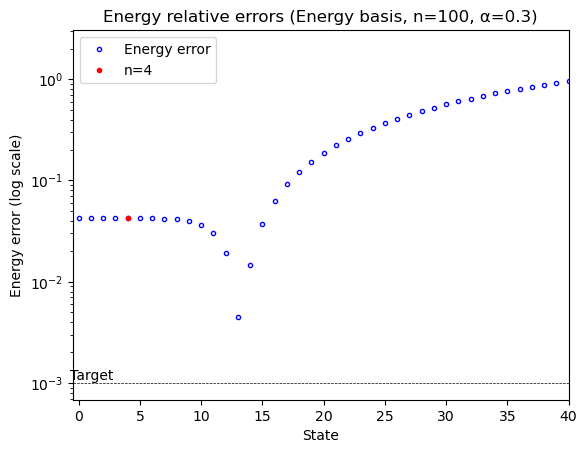

In [42]:
plot_max_n = 40 # limit the plot range to the lowest states
plt.plot(range(n),np.abs(energy_errors_positionbasis),'b.',mfc='none',label="Energy error")
plt.plot(n_target, np.abs(energy_errors_positionbasis[n_target]),'r.',label=f"n={n_target}")
plt.xlabel("State")
plt.ylabel("Energy error (log scale)")
plt.xlim(-0.5,plot_max_n)
plt.axhline(error_target,c='k',lw=0.5,ls="dashed")
plt.text(-0.7,error_target,"Target",fontsize="medium",verticalalignment="bottom")
plt.yscale("log")
plt.legend()
plt.title(f"Energy relative errors (Energy basis, n={n}, α={alpha})")

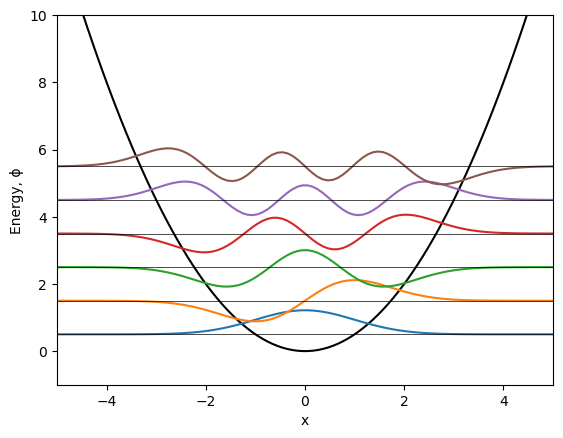

In [43]:
number = np.arange(6) #which wavefunctions to plot, starting counting from zero
zoom = 3.0 # zoom factor for plotting the wavefunctions to make them more visible
plt.plot(x,V(x),'-k',label="V(x)") # plot the potential
for num in number:
    plt.plot(x,zoom*wavefunctions[:,num]+energies[num],label=num) #plot the num-th wavefunction
    plt.hlines(energies[num],-5,5,color="black",linewidth=0.5)
plt.ylim(-1,10); # set limits of vertical axis for plot
plt.xlim(-5,5); # set limits of horizontal axis for plot
#plt.legend(loc="lower center");
plt.xlabel("x");
plt.ylabel("Energy, ϕ");

# Variational method
Code implementing the variational principle for a 1D potential.
To try different things, change:
- the potential function V
- the wavefunction psi
- the initial guess of the wavefunction parameters aguess

In [44]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
from numdifftools import Derivative

In [ ]:
xmin = -10.0; xmax = 10.0 #limits of integration, may be np.inf (infinity), although you'll need to adjust the plots below
hbar = 1.0; mass = 1.0; omega=1.0 # some constants.  Changing mass will also change the energy scale.
alpha = 0.1

In [46]:
def V(x):
    # this example is the harmonic oscillator
    # make sure this function is "vectorizable" and does not have any division by zero
    return mass*(omega**2+alpha**2)*x**2/2

In [ ]:
def psi(x,beta):
    '''Wavefunction as a function of position x.
    beta is the variational parameter'''
    # Note, normalization is not necessary
    # Tip: if your wavefunction is defined piecewise, see https://numpy.org/doc/stable/reference/generated/numpy.piecewise.html
    return np.exp(-beta*x**2)

In [48]:
betaguess = 0.5 # guess of the arguments that minimize the wavefunction

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# for plotting only, 
xlist = np.linspace(xmin, xmax, 101)
ylist = [V(x) for x in xlist]
psilist = [psi(x,betaguess) for x in xlist]

In [51]:
def Hpsi(x,beta):
    '''The Hamiltonian acting on psi at point x'''
    d2psi = Derivative(lambda x: psi(x,beta), n=2)
    return -0.5*hbar**2/mass *d2psi(x) + V(x)*psi(x,beta)

In [52]:
def EVH(beta, psi):
    '''Expectation value of the Hamiltonian for wavefunction psi that has the argument beta
    psi is a function of x and beta
    beta is a parameter for the wavefunction'''
    # Calculate normalization of psi
    norm = quad(lambda x, a:np.abs(psi(x,beta))**2, xmin, xmax, args=(beta,))[0]
    ev = quad(lambda x, a:np.conj(psi(x,beta))*Hpsi(x,a), xmin, xmax, args=(beta,))[0]
    return ev/norm

In [53]:
output = minimize(EVH, betaguess, args=(psi,))
outlist = [psi(x,output.x) for x in xlist]

In [54]:
problist = [np.abs(psi(x,output.x))**2 for x in xlist]


In [55]:
print(f"Minimum energy = {output.fun:#.3g} for beta = {output.x[0]:#.3g}")

Minimum energy = 0.502 for beta = 0.502


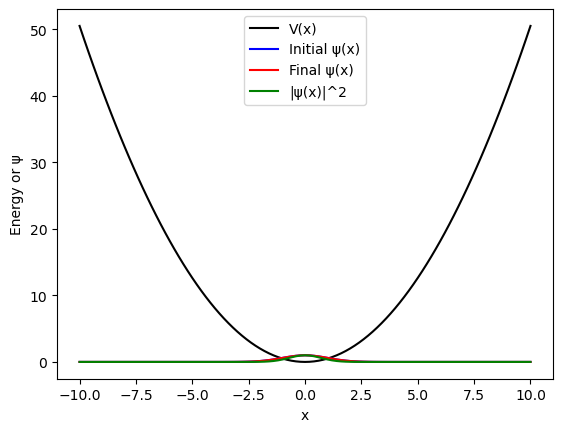

In [56]:
plt.plot(xlist,ylist,'k-', label = "V(x)")
plt.plot(xlist,psilist,'b-', label = "Initial ψ(x)")
plt.plot(xlist,outlist,'r-', label = "Final ψ(x)")
plt.plot(xlist,problist, 'g-', label = "|ψ(x)|^2")
plt.legend();
plt.xlabel("x");
plt.ylabel("Energy or ψ");